<a href="https://colab.research.google.com/github/dimaszuda/dimaszuda/blob/main/clean_vs_messy_rooom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Program ini dibuat untuk memprediksi sebuah ruangan yang rapi dan berantakan. Model ini dibangun menggunakan Feed Forward Neural Network

In [1]:
import tensorflow as tf
print(tf.__version__
)

2.8.2


In [2]:
import zipfile, os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2022-07-02 02:29:40--  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip [following]
--2022-07-02 02:29:40--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   121MB/s    in 0.6s    

2022-07-02 02:29:46 

In [4]:
#esktrak file zip yang telah diunduh
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [5]:
os.listdir('/tmp/images/train')
os.listdir('/tmp/images/val')

['messy', 'clean']

In [6]:
#membuat direktori ruangan rapi pada direktori data train
train_clean_dir = os.path.join(train_dir, 'clean')

#membuat direktori ruangan berantakan pada direktori data val
train_messy_dir = os.path.join(train_dir, 'messy')

#membuat direktori ruangan rapi pada direktori data validation
validation_clean_dir = os.path.join(validation_dir, 'clean')

#membuat direktori ruangan berantakan pada direktori data validation
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir, #direktori data latih
    target_size=(150,150), #mengubah resolusi seluruh image
    batch_size=4,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=4,
    class_mode='binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')                            
])

In [10]:
#compile model dengan adam optimizer loss function
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy']
              )

In [11]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 10s - loss: 0.7368 - accuracy: 0.4900 - val_loss: 0.6897 - val_accuracy: 0.5000 - 10s/epoch - 407ms/step
Epoch 2/20
25/25 - 7s - loss: 0.7036 - accuracy: 0.4800 - val_loss: 0.6930 - val_accuracy: 0.5000 - 7s/epoch - 264ms/step
Epoch 3/20
25/25 - 7s - loss: 0.6934 - accuracy: 0.4400 - val_loss: 0.6931 - val_accuracy: 0.5000 - 7s/epoch - 260ms/step
Epoch 4/20
25/25 - 7s - loss: 0.6924 - accuracy: 0.5800 - val_loss: 0.6857 - val_accuracy: 0.5000 - 7s/epoch - 261ms/step
Epoch 5/20
25/25 - 7s - loss: 0.6879 - accuracy: 0.4900 - val_loss: 0.6610 - val_accuracy: 0.6000 - 7s/epoch - 292ms/step
Epoch 6/20
25/25 - 7s - loss: 0.6518 - accuracy: 0.6500 - val_loss: 0.6014 - val_accuracy: 0.6000 - 7s/epoch - 261ms/step
Epoch 7/20
25/25 - 7s - loss: 0.6431 - accuracy: 0.6600 - val_loss: 0.6654 - val_accuracy: 0.5500 - 7s/epoch - 260ms/step
Epoch 8/20
25/25 - 7s - loss: 0.6736 - accuracy: 0.5400 - val_loss: 0.5960 - val_accuracy: 0.8500 - 7s/epoch - 262ms/step
Epoch 9/20
25/25 - 7s 

Saving WhatsApp Image 2022-07-02 at 10.10.02.jpeg to WhatsApp Image 2022-07-02 at 10.10.02.jpeg
WhatsApp Image 2022-07-02 at 10.10.02.jpeg
messy


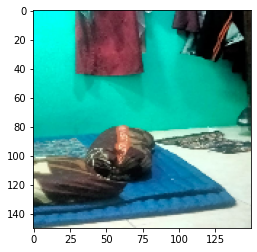

In [12]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes == 0:
    print('clean')
  else:
    print('messy')

Model sudah bisa memprediksi gambar dengan baik.